## LESSON 3

In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [2]:
# Set parameters

nx = 41
L= 2.0
dx = L /(nx-1)

nu = 0.3

sigma = 0.2
dt = sigma * dx**2 / nu
nt = 20

In [3]:
x = numpy.linspace(0.0, L, num=nx)

In [4]:
# creating a numpy array u for setting intial parameters
u0 = numpy.ones(nx)
mask = numpy.where((x>=0.5)&(x<=1.0))

u0[mask]=2.0

In [5]:
u = u0.copy()

for n in range(nt):
    un = u.copy()
# here we use nx-1 because we dont have u(i+1) value for last element in array acc. to FTCS eqn. (check notes)
    for i in range(1,nx-1):
        u[i] = un[i] + sigma * ( un[i-1]  - 2 * un[i] + un[i+1])
#   u[0]=1.0
#   u[-1]=1.0

u_naive = u
        

In [6]:
u = u0.copy()

for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2* un[1:-1] + un[2:])
    
 # using numpy slicing   
    

In [7]:
numpy.allclose(u_naive,u)

True

In [35]:
def diffusion(u0, sigma, nt = 20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (un[:-2] - 2* un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist
    

In [68]:
u_hist = diffusion(u0,1.2,nt = 20)

In [69]:
len(u_hist)

21

In [70]:
def plot_solution(n, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x,u_hist[0],label='initial')
    pyplot.plot(x,u_hist[n],label='current')
    pyplot.legend()
    pyplot.xlim(0.0,2.0)
    pyplot.ylim(0.5,2.5)
    pyplot.show()

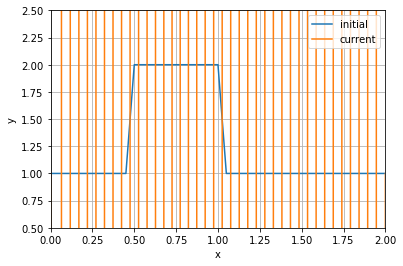

In [71]:
plot_solution(20, u_hist ,x)

In [72]:
import ipywidgets

In [73]:
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1, description= 'time step')

w = ipywidgets.interactive(plot_solution, n=nt_slider , u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))



In [74]:
w

interactive(children=(IntSlider(value=0, description='time step', max=20), Output()), _dom_classes=('widget-in…